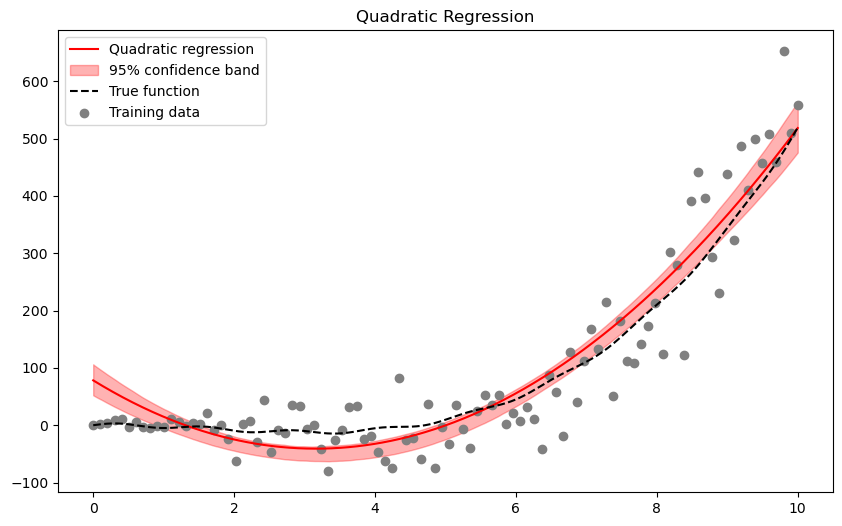

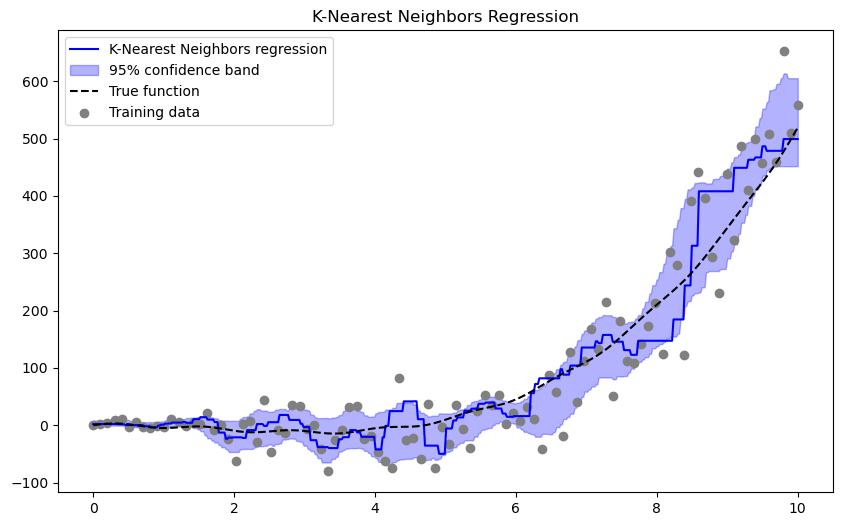

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample

# Generate sample data
np.random.seed(0)
n_samples = 100
X = np.linspace(0, 10, n_samples)

# Create a more complex true function with larger noise
Y_true = X**3 - 5*X**2 + 2*X + 3*np.sin(5*X)
noise = np.random.randn(n_samples) * 10 * X  # Increase the noise level
Y = Y_true + noise

# Reshape X and Y
X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1)

# Use the whole data as training data
X_train, Y_train = X, Y

# Create a separate array for prediction and plotting
X_range = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)

# Quadratic Regression
quad_regressor = make_pipeline(PolynomialFeatures(2), LinearRegression())
quad_regressor.fit(X_train, Y_train)

# K-Nearest Neighbors Regression
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, Y_train)

n_bootstrap = 1000
alpha = 0.95
quad_preds = []
knn_preds = []

# Bootstrap
for _ in range(n_bootstrap):
    X_sample, Y_sample = resample(X_train, Y_train)

    # Fit and predict with each model
    quad_regressor.fit(X_sample, Y_sample)
    quad_preds.append(quad_regressor.predict(X_range).ravel())

    knn_regressor.fit(X_sample, Y_sample)
    knn_preds.append(knn_regressor.predict(X_range).ravel())

# Convert predictions to arrays
quad_preds = np.array(quad_preds)
knn_preds = np.array(knn_preds)

# Compute the percentiles of predictions for confidence bands
lower_quad = np.percentile(quad_preds, (1-alpha)/2*100, axis=0)
upper_quad = np.percentile(quad_preds, (alpha+(1-alpha)/2)*100, axis=0)

lower_knn = np.percentile(knn_preds, (1-alpha)/2*100, axis=0)
upper_knn = np.percentile(knn_preds, (alpha+(1-alpha)/2)*100, axis=0)

# Plotting Quadratic regression
plt.figure(figsize=(10, 6))
plt.plot(X_range, quad_regressor.predict(X_range), 'r', label='Quadratic regression')
plt.fill_between(X_range.ravel(), lower_quad, upper_quad, color='red', alpha=0.3, label='95% confidence band')
plt.plot(X_range, X_range**3 - 5*X_range**2 + 2*X_range + 3*np.sin(5*X_range), 'k--', label='True function')
plt.scatter(X_train, Y_train, color='gray', label='Training data')
plt.title("Quadratic Regression")
plt.legend()
plt.show()

# Plotting K-Nearest Neighbors regression
plt.figure(figsize=(10, 6))
plt.plot(X_range, knn_regressor.predict(X_range), 'b', label='K-Nearest Neighbors regression')
plt.fill_between(X_range.ravel(), lower_knn, upper_knn, color='blue', alpha=0.3, label='95% confidence band')
plt.plot(X_range, X_range**3 - 5*X_range**2 + 2*X_range + 3*np.sin(5*X_range), 'k--', label='True function')
plt.scatter(X_train, Y_train, color='gray', label='Training data')
plt.title("K-Nearest Neighbors Regression")
plt.legend()
plt.show()
